# Workshop # 7

In [1]:
#Import Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:

df = pd.read_csv("titanic-train.csv")

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [68]:
df2 = df.loc[:,['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [69]:
print('Age missing ', df2['Age'].isnull().sum())
print('PClass missing ', df2['Pclass'].isnull().sum())
print('SibSp missing ', df2['SibSp'].isnull().sum())
print('Parch missing ', df2['Parch'].isnull().sum())
print('Survived missing ', df2['Survived'].isnull().sum())

Age missing  177
PClass missing  0
SibSp missing  0
Parch missing  0
Survived missing  0


In [70]:
df2['Age'] = df2['Age'].fillna(df2['Age'].mean())

print('Age missing ', df2['Age'].isnull().sum())

Age missing  0


In [71]:
df2.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], dtype='object')

In [72]:
df3 = pd.get_dummies(df2)
df3.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male
0,0,3,22.0,1,0,0,1
1,1,1,38.0,1,0,1,0
2,1,3,26.0,0,0,1,0
3,1,1,35.0,1,0,1,0
4,0,3,35.0,0,0,0,1


In [74]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(df3[['Pclass','Sex_female','Sex_male','Age','SibSp','Parch']], 
                                                    df3['Survived'], 
                                                    train_size=0.7, 
                                                    random_state=123)
print("Labels for training and testing data")
print(train_X)

Labels for training and testing data
     Pclass  Sex_female  Sex_male        Age  SibSp  Parch
416       2           1         0  34.000000      1      1
801       2           1         0  31.000000      1      1
512       1           0         1  36.000000      0      0
455       3           0         1  29.000000      0      0
757       2           0         1  18.000000      0      0
275       1           1         0  63.000000      1      0
121       3           0         1  29.699118      0      0
443       2           1         0  28.000000      0      0
458       2           1         0  50.000000      0      0
653       3           1         0  29.699118      0      0
725       3           0         1  20.000000      0      0
395       3           0         1  22.000000      0      0
754       2           1         0  48.000000      1      2
40        3           1         0  40.000000      1      0
217       2           0         1  42.000000      1      0
457       1        

/Users/kris/anaconda3/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [30]:
print(train_X)

[[-0.38650536 -1.34398895  0.32679126  0.42278951  0.80910353]
 [-0.38650536 -1.34398895  0.09075797  0.42278951  0.80910353]
 [-1.59046957  0.74405373  0.48414679 -0.45228645 -0.46702685]
 ...
 [ 0.81745884  0.74405373  0.16943573 -0.45228645 -0.46702685]
 [ 0.81745884  0.74405373  0.01208021 -0.45228645 -0.46702685]
 [ 0.81745884  0.74405373 -0.06659756 -0.45228645 -0.46702685]]


In [76]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(2),solver='sgd',learning_rate_init=0.01,max_iter=500)
mlp.fit(train_X,train_y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=2, learning_rate='constant',
       learning_rate_init=0.01, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [77]:

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [78]:
print("Predicting Titanic on the test set using Multi-Layer Precepiton")

y_pred = mlp.predict(test_X)


print(classification_report(test_y, y_pred))
print(confusion_matrix(test_y, y_pred))


Predicting Titanic on the test set using Multi-Layer Precepiton
             precision    recall  f1-score   support

          0       0.84      0.86      0.85       170
          1       0.76      0.72      0.74        98

avg / total       0.81      0.81      0.81       268

[[147  23]
 [ 27  71]]


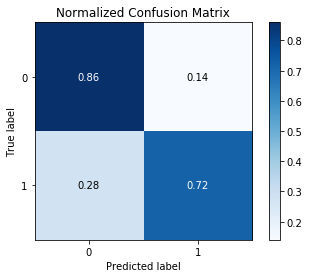

In [79]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(test_y, y_pred, normalize=True)
plt.show()